In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales_train_raw = pd.read_csv('../resources/sales_train_v2.csv')

In [3]:
sales_train = sales_train_raw.copy()

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
sales_train['total_cost'] = sales_train['item_price'] * sales_train['item_cnt_day']
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_cost
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


In [6]:
imcome_by_shop = sales_train.groupby(['shop_id'])['total_cost'].agg(sum)

<Container object of 60 artists>

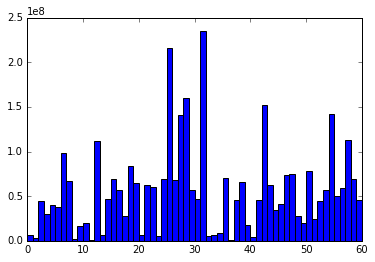

In [7]:
plt.bar(imcome_by_shop.index,imcome_by_shop,1, color = 'blue')

In [11]:
sales_train.drop(['item_price','item_cnt_day','date'], axis = 1, inplace = True)

In [12]:
sales_train.head()

,date_block_num,shop_id,item_id,total_cost
0,0,59,22154,999.00
1,0,25,2552,899.00
2,0,25,2552,-899.00
3,0,25,2554,1709.05
4,0,25,2555,1099.00


In [13]:
imcome_by_shop = sales_train.groupby(['date_block_num','shop_id','item_id']).sum()

In [17]:
imcome_by_shop.reset_index(['date_block_num','shop_id','item_id'],inplace = True)

In [18]:
imcome_by_shop.head()

,date_block_num,shop_id,item_id,total_cost
0,0,0,32,1326.0
1,0,0,33,1041.0
2,0,0,35,247.0
3,0,0,43,221.0
4,0,0,51,257.0


In [23]:
X = imcome_by_shop.loc[:,imcome_by_shop.columns != 'total_cost']
y = imcome_by_shop['total_cost']

In [27]:
y.head()

0    1326.0
1    1041.0
2     247.0
3     221.0
4     257.0
Name: total_cost, dtype: float64

In [28]:
test_raw = pd.read_csv('../resources/test.csv')

In [29]:
test = test_raw.copy()
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
sample = pd.read_csv('../resources/sample_submission.csv')
sample.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
